# Car sales insights and Analysis 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings. filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
raw_data =  pd.read_csv('Car sales.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include = 'all')

# If we use raw_data.describe() it will give data only for numerical parts 
# On using raw_data.describe(include = 'all') we will get data for non numerical part along with numerical part

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In the above table we can see that there are 312 different models i.e, 312 dummies which is not convenient

So we will drop this column as MODELS and info can be engineered from BRAND, YEAR and ENGINEV

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# DEALING WITH MISSING DATA

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

We can see that we have 172 Null values for Price and 150 Null values for EngineV

So we will remove all these rows.

In [6]:
data_no_mv = data.dropna(axis = 0)

In [7]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Now we will remove the Outliers

Outliers are extreme values that lie on abnormal distance from rest of values in a given dataset 

<AxesSubplot:xlabel='Price', ylabel='Density'>

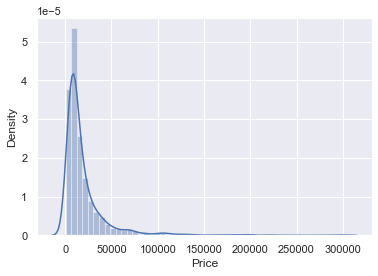

In [8]:
sns.distplot(data_no_mv['Price'])

We know that 75% of cars have Price < 21900. Also in above graph we can see the outliers. So we will drop the top 1% of observations. To deal with this we can use quantile method.

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

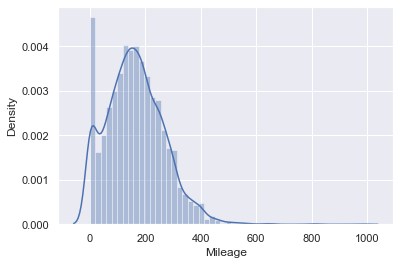

In [10]:
sns.distplot(data_no_mv['Mileage'])

Similarly for Mileage also we will drop top 1% of observations to deal with outliers

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

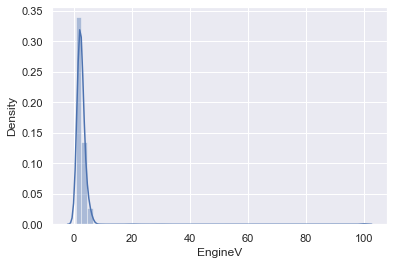

In [12]:
sns.distplot(data_no_mv['EngineV'])

EngineV has maximum value of 99.99 which is not reasonable. Generally EngineV has value less than 6.5. So, we will drop rest of values.

In [13]:
data_3 = data_2[data_2['EngineV']<6.5]

<AxesSubplot:xlabel='Year', ylabel='Density'>

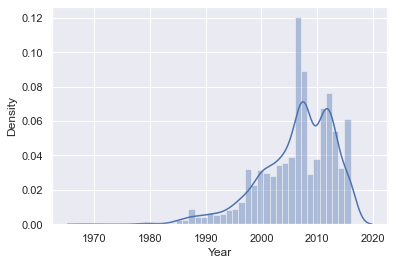

In [14]:
sns.distplot(data_3['Year'])

For the above distribution plot we can observe that we have more cars of 21st century. So we will drop the bottom 1% of observations.

In [15]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

Now we have the dataset in which all the Null and unresonable data have been removed.

In [16]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Plotting the Scatter Plot

Plotting the scatter plot for Price vs Year, Price vs EngineV and Price vs Mileage.

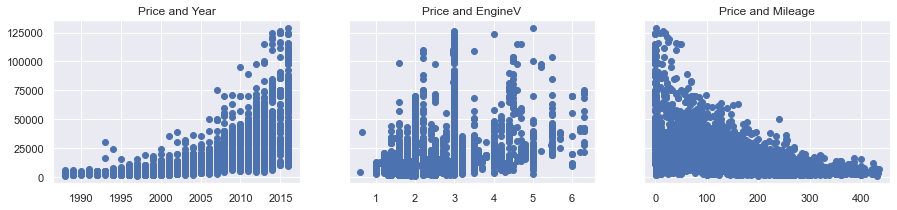

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In the above charts we can see that there forms some pattern in each chart which is not a linear one to run the linear regression. Moreover in the chart of Price distribution we can see that it is kind of exponential chart. So we need to convert it into linear model.

So to deal with this we will use log transformation in which price will be converted to log (price) using numpy.

<AxesSubplot:xlabel='Price', ylabel='Density'>

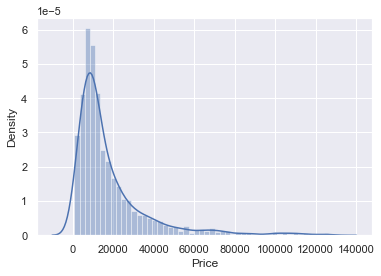

In [18]:
sns.distplot(data_cleaned['Price'])

In the above charts we can see that there forms some pattern in each chart which is not a linear one to run the linear regression. Moreover in the chart of Price distribution we can see that it is kind of exponential chart. So we need to convert it into linear model.

So we will transform price to log(price) for obtaining linear graph and add a new column in the table.

In [19]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


Now we will plot scatter Plot for log Price vs Year, log Price vs EngineV and log Price vs Mileage.

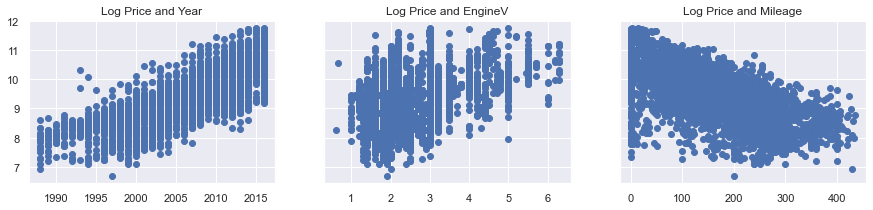

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

It can be observed that now these scatter plots are linear kind of charts and thus we can plot the linear regression line.

# Plotting Linear Regression

Defining the independent and dependent variables

In [21]:
y = data_cleaned['log_price'] #dependent variable
x1 = data_cleaned['Year'] #independent variable

The equation for a linear regression is given by

yhat = b*x1 + constant

We want to obtain values of constant and 'b'.

The new variable here 'results' will contain the output of the OLS (Ordinary Least Squares) regression.

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     4877.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:26:33   Log-Likelihood:                -3399.3
No. Observations:                3867   AIC:                             6803.
Df Residuals:                    3865   BIC:                             6815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -205.8401      3.082    -66.779      0.000    -211.883    -199.797
Year           0.1073      0.002     69.834      0.000       0.104       0.110
==============================================================================
Omnibus:                       30.976   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.210
Skew:                           0.033   Prob(JB):                     2.48e-05
Kurtosis:                       2.643   Cond. No.                     6.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we have the scatter plot between Log Price and Year.

From above summary table we can see that constant = -205.8401 and coef of Year = 0.1073.

Thus we get equation of linear equation line as yhat=0.1073*x1 - 205.8401 which we will plot in scatter plot.

[]

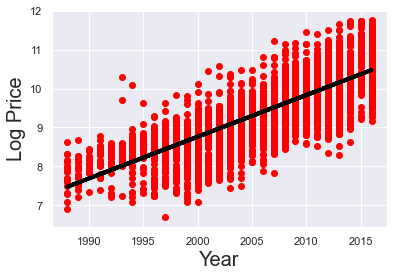

In [23]:
plt.scatter(x1,y, color='red')
yhat=0.1073*x1 - 205.8401
fig = plt.plot(x1, yhat, lw=4, c='black', label='regression line')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Log Price', fontsize=20)
plt.plot()

# Plotting the Relational Plot

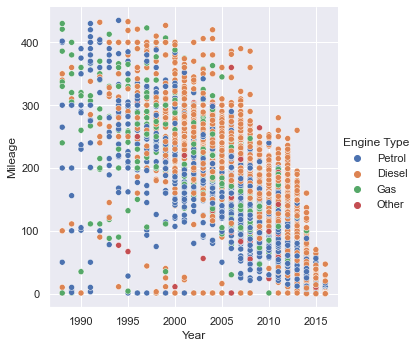

In [24]:
sns.relplot(x='Year',y='Mileage', data = data_cleaned , hue = 'Engine Type')

It is observable from above chart that cars that to be resold in 1990s majorly consists of Petrol and Gas cars. In 2000s the trend changed and people started preffered Diesel cars and thus have majority in the reselling.

We can also conclude that reselling Petrol and Gas cars have lower milegage i.e people used them very less in comparision to Diesel cars which had more mileage even when compared with cars from same year.  

# Plotting K-mean Clustering

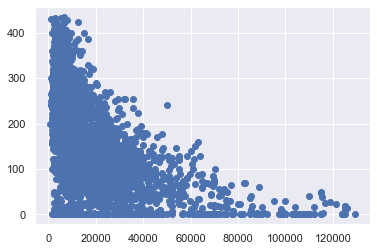

In [25]:
plt.scatter(data_cleaned['Price'],data_cleaned['Mileage'])

Seperating columns for which we want to plot the k-Means clustering

In [26]:
x = data_cleaned.iloc[:,1:4]
x

,Price,Body,Mileage
0,4200.0,sedan,277
1,7900.0,van,427
2,13300.0,sedan,358
3,23000.0,crossover,240
4,18300.0,crossover,120
...,...,...,...
3862,11500.0,van,163
3863,17900.0,sedan,35
3864,125000.0,sedan,9
3865,6500.0,sedan,1


In [27]:
x = x.drop(['Body'],axis=1)

Defining number of clusters we want

In [28]:
kmeans = KMeans(4)

In [29]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [30]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 2, ..., 1, 2, 2])

Creating a new data 'clustered_data' also containing the cluster numbers.

In [31]:
clustered_data = data_cleaned.copy()
clustered_data['Clusters'] = identified_clusters
clustered_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price,Clusters
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840,2
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618,2
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519,2
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656,0
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102,2
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556,0
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069,1
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557,2


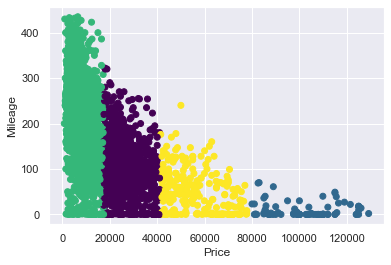

In [32]:
plt.scatter(clustered_data['Price'],clustered_data['Mileage'], c = clustered_data['Clusters'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.show()

The data has been divided into 4 different clusters.

1st cluster show cars having price upto about 20000. Many of these have high mileage which is the reason for low prices.

2nd cluster shows cars having price upto about 40000. These cars don't have high mileage.

3rd cluster belongs cars having price upto about 80000. These cars have further lower mileage as compared to 2nd cluster.

4th cluster belongs to cars having very less mileage. Thus their price is very high and have price range from 80000 to 130000.